In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Aylara_Gore_Satis.csv')

In [3]:
df.head()

,Aylar,Satislar
0,8,19671.5
1,10,23102.5
2,11,18865.5
3,13,21762.5
4,14,19945.5


In [4]:
df.describe()

,Aylar,Satislar
count,30.000000,30.000000
mean,33.333333,38001.500000
std,17.131003,13707.214892
min,8.000000,18865.500000
25%,20.000000,28360.375000
50%,30.000000,32618.500000
75%,47.750000,50272.375000
max,65.000000,61195.500000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Aylar     30 non-null     int64  
 1   Satislar  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [6]:
df.isnull().sum()

Aylar       0
Satislar    0
dtype: int64

## Verilerimize on islemeye gerek yok

## Train ve Test olarak ayiralim;

In [7]:
aylar = df[['Aylar']] # Bagimsiz Degiskenimiz
satislar = df[['Satislar']] # Bagimli Degiskenimiz

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(aylar, satislar, test_size=0.33, random_state=0)

## Modelimizi Olusturalim;

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lr = LinearRegression()

#### x_train'den y_train'i tahmin edecek

In [12]:
lr.fit(x_train, y_train)

LinearRegression()

#### x_test'den y_test'i tahmin edecek

In [13]:
tahmin = lr.predict(x_test)

In [14]:
tahmin

array([[20991.93663769],
       [62142.93172873],
       [32638.44468232],
       [31862.01081268],
       [58260.76238052],
       [54378.59303231],
       [58260.76238052],
       [31862.01081268],
       [38849.91563946],
       [50496.4236841 ]])

In [15]:
y_test

,Satislar
2,18865.5
28,61195.5
13,28540.5
10,31609.0
26,58484.5
24,54715.5
27,56317.5
11,27897.0
17,41544.0
22,50651.0


## Modelimizin hata oranini bulalim

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
mean_absolute_error(y_test, tahmin)

1674.2402318238824

## Verilerimizi Gorsellestirelim

In [18]:
import matplotlib.pyplot as plt

In [19]:
%matplotlib inline

#### Grafigin daha duzgun gorunmesi icin verilerimizi siralayalim;

In [20]:
x_train = x_train.sort_index()
y_train = y_train.sort_index()

Text(0, 0.5, 'Satis Miktari')

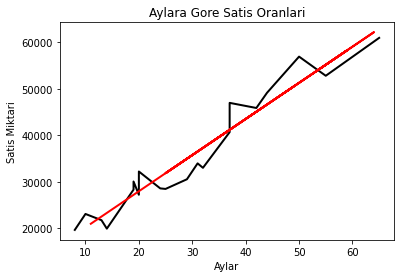

In [38]:
plt.plot(x_train.values, y_train.values, 'k', linewidth='2')
plt.plot(x_test.values, tahmin, 'r', linewidth='2')
plt.title('Aylara Gore Satis Oranlari')
plt.xlabel('Aylar')
plt.ylabel('Satis Miktari')